In [1]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.utils.video_visualizer import VideoVisualizer

D:\Ott_diploma_proj_prog_files\conda\envs\ott_diploma\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
classes = ['icy_tile', 'icy_asphalt', 'powdery_snow', 'snow_drift', 'puffy_road_snow', 'snowy_road']
colors = [(255,255,0),(0,0,255),(0,255,0),(255,0,255), (180,165,0), (187,132,156)]

MetadataCatalog.get("category").set(thing_classes=classes, thing_colors = colors) 
  
    

microcontroller_metadata = MetadataCatalog.get("category")

In [3]:
cfg_instance_seg = get_cfg()
cfg_instance_seg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_instance_seg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
cfg_instance_seg.MODEL.WEIGHTS = os.path.join("output", "model_final.pth")
cfg_instance_seg.MODEL.ROI_HEADS.NUM_CLASSES = 6
predictor = DefaultPredictor(cfg_instance_seg)

[05/03 14:48:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from output\model_final.pth ...


In [4]:
class MyVisualizer(Visualizer):
    def _jitter(self, color ):
        return color

In [5]:

data_path = 'DATA/test/58.jpg'

C:\Users\gvo2\AppData\Roaming\Python\Python37\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


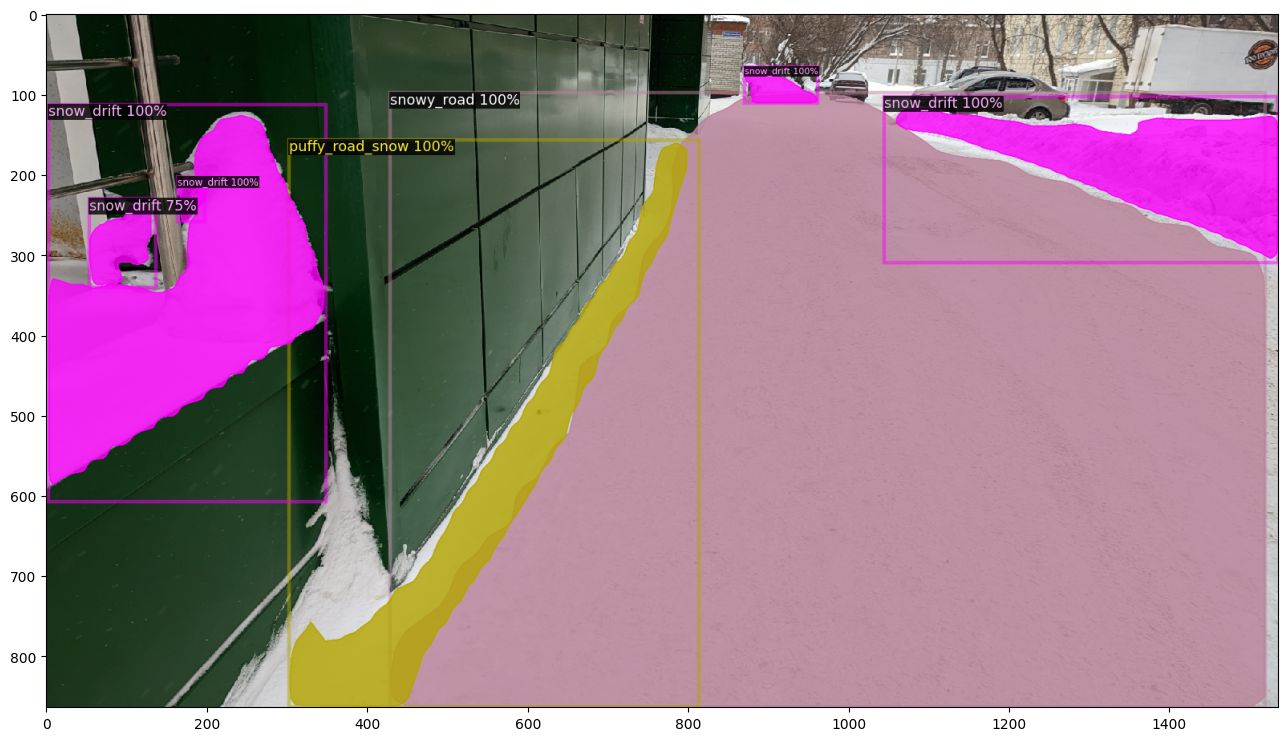

In [6]:
img = cv2.imread(data_path)
outputs = predictor(img)
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

In [121]:
#experiments
#delete in the end!

In [7]:
outputs['instances']

Instances(num_instances=7, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[ 535.6589,  122.9596, 1900.3236, 1079.7889],
        [1088.9985,   82.9279, 1203.0222,  139.3830],
        [   3.5276,  140.8367,  436.4675,  760.1681],
        [1306.5404,  128.6085, 1920.0000,  387.0130],
        [ 378.5766,  196.2298, 1017.0646, 1080.0000],
        [ 204.8917,  253.2695,  246.9206,  324.2819],
        [  67.5712,  287.8897,  171.4368,  426.7841]], device='cuda:0')), scores: tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9991, 0.9956, 0.7531],
       device='cuda:0'), pred_classes: tensor([5, 3, 3, 3, 4, 3, 3], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False, 

In [15]:
outputs.items()


dict_items([('instances', Instances(num_instances=7, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[ 535.6589,  122.9596, 1900.3236, 1079.7889],
        [1088.9985,   82.9279, 1203.0222,  139.3830],
        [   3.5276,  140.8367,  436.4675,  760.1681],
        [1306.5404,  128.6085, 1920.0000,  387.0130],
        [ 378.5766,  196.2298, 1017.0646, 1080.0000],
        [ 204.8917,  253.2695,  246.9206,  324.2819],
        [  67.5712,  287.8897,  171.4368,  426.7841]], device='cuda:0')), scores: tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9991, 0.9956, 0.7531],
       device='cuda:0'), pred_classes: tensor([5, 3, 3, 3, 4, 3, 3], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
     

In [32]:
mask = outputs['instances'].pred_masks[0].cpu().numpy().astype('uint8')

In [44]:
masks = []
for pred_mask in outputs['instances'].pred_masks:
    masks.append(pred_mask.cpu().numpy().astype('uint8'))

In [50]:
classes = []
for cls in outputs['instances'].pred_classes:
    classes.append(cls.cpu().numpy().astype('uint8'))

In [89]:
outputs['instances'].scores

tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9991, 0.9956, 0.7531],
       device='cuda:0')

In [106]:
type(outputs['instances'])

detectron2.structures.instances.Instances

In [105]:
outputs['instances']

Instances(num_instances=7, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[ 535.6589,  122.9596, 1900.3236, 1079.7889],
        [1088.9985,   82.9279, 1203.0222,  139.3830],
        [   3.5276,  140.8367,  436.4675,  760.1681],
        [1306.5404,  128.6085, 1920.0000,  387.0130],
        [ 378.5766,  196.2298, 1017.0646, 1080.0000],
        [ 204.8917,  253.2695,  246.9206,  324.2819],
        [  67.5712,  287.8897,  171.4368,  426.7841]], device='cuda:0')), scores: tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9991, 0.9956, 0.7531],
       device='cuda:0'), pred_classes: tensor([5, 3, 3, 3, 4, 3, 3], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False, 

In [ ]:
new_output = detectron2.structures.instances.Instances(num)

In [49]:
####
outputs['instances'].pred_classes.cpu().numpy().astype('uint8')

array([5, 3, 3, 3, 4, 3, 3], dtype=uint8)

In [109]:
outputs['instances'].pred_boxes

Boxes(tensor([[ 535.6589,  122.9596, 1900.3236, 1079.7889],
        [1088.9985,   82.9279, 1203.0222,  139.3830],
        [   3.5276,  140.8367,  436.4675,  760.1681],
        [1306.5404,  128.6085, 1920.0000,  387.0130],
        [ 378.5766,  196.2298, 1017.0646, 1080.0000],
        [ 204.8917,  253.2695,  246.9206,  324.2819],
        [  67.5712,  287.8897,  171.4368,  426.7841]], device='cuda:0'))

In [60]:
outputs['instances'].pred_classes

tensor([5, 3, 3, 3, 4, 3, 3], device='cuda:0')

In [85]:
classes = []
masks_tmp = []
boxes = []
for i in range(len(outputs['instances'].pred_classes)):
    for j in range(i, len(outputs['instances'].pred_classes)):
        if outputs['instances'].pred_classes[i] == outputs['instances'].pred_classes[j]:
            outputs['instances'].pred_masks[i] = torch.logical_or(outputs['instances'].pred_masks[i], outputs['instances'].pred_masks[j])
            if (int(outputs['instances'].pred_classes[i].cpu()) not in classes):
                classes.append(int(outputs['instances'].pred_classes[i].cpu()))
    masks_tmp.append(outputs['instances'].pred_masks[i].cpu().numpy().astype('bool'))
masks = []
for i in range(len(classes)):
    masks.append(masks_tmp[i])


        

            
    

In [71]:
classes

[5, 3, 4]

In [87]:
cuda0 = torch.device('cuda:0')

In [78]:
torch.tensor(classes, device=cuda0)

tensor([5, 3, 4], device='cuda:0')

In [83]:
torch.tensor(masks, device=cuda0)

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [88]:
outputs['instances'].pred_classes = torch.tensor(classes, device=cuda0)
outputs['instances'].pred_masks = torch.tensor(masks, device=cuda0)

AssertionError: Adding a field of length 3 to a Instances of length 7

In [126]:
d = {dicta: 1, 'dictionary':2}
d

NameError: name 'dicta' is not defined

In [110]:
#start work here

In [7]:
classes = []
masks = []
scores = []
flag = True
for i in range(len(outputs['instances'].pred_classes)):
    for j in range(i, len(outputs['instances'].pred_classes)):
        if outputs['instances'].pred_classes[i] == outputs['instances'].pred_classes[j]:
            if (int(outputs['instances'].pred_classes[i].cpu()) not in classes):
                classes.append(int(outputs['instances'].pred_classes[i].cpu()))

for cls in classes:
    last_mask = None
    print(cls)
    for i in range(len(outputs['instances'].pred_classes)):
        if cls == int(outputs['instances'].pred_classes[i].cpu()):
            if last_mask == None:
                last_mask = outputs['instances'].pred_masks[i]
            last_mask = torch.logical_or(outputs['instances'].pred_masks[i], last_mask)
    masks.append(last_mask.cpu().numpy().astype('bool'))
                
             
for i in range(len(classes)):
    scores.append(1)
num_inst = len(classes)
    

5
3
4


In [8]:
box = [0, 0, 1920, 1080]

In [9]:
cuda0 = torch.device('cuda:0')

In [10]:
boxes = []
for i in range(len(classes)):
    boxes.append(box)
boxes = torch.tensor(boxes, device=cuda0)
boxes = detectron2.structures.boxes.Boxes(boxes)
boxes

Boxes(tensor([[   0.,    0., 1920., 1080.],
        [   0.,    0., 1920., 1080.],
        [   0.,    0., 1920., 1080.]], device='cuda:0'))

In [11]:
classes = torch.tensor(classes, device=cuda0)
masks = torch.tensor(masks, device=cuda0)
scores = torch.tensor(scores, device=cuda0)

D:\Ott_diploma_proj_prog_files\conda\envs\ott_diploma\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:204.)
  


In [12]:
new_ouputs = detectron2.structures.instances.Instances(image_size = (1080, 1920))

In [13]:
new_ouputs.set('pred_boxes', boxes)
new_ouputs.set('scores', scores)
new_ouputs.set('pred_classes', classes)
new_ouputs.set('pred_masks', masks)

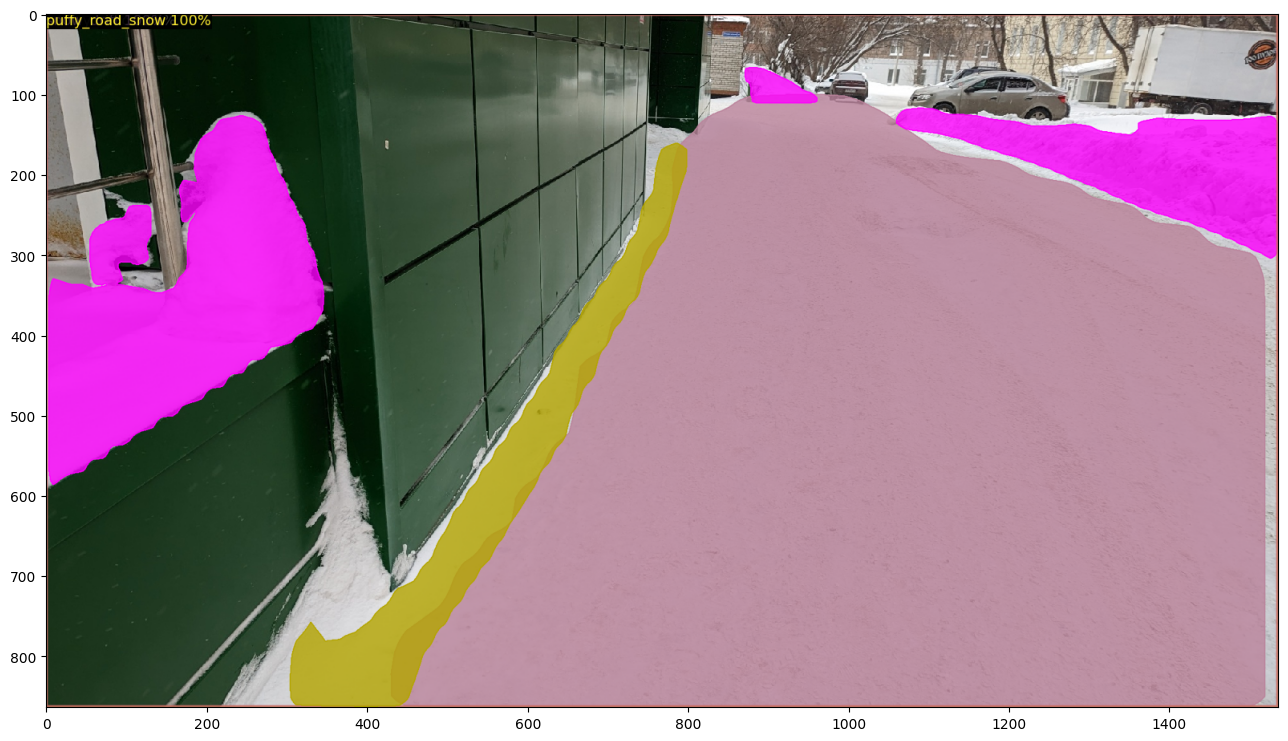

In [14]:
img = cv2.imread(data_path)
#outputs = predictor(img)
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
v = v.draw_instance_predictions(new_ouputs.to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

# new experiment below

In [15]:
classes = []
masks = []
scores = []
flag = True
for i in range(len(outputs['instances'].pred_classes)):
    for j in range(i, len(outputs['instances'].pred_classes)):
        if outputs['instances'].pred_classes[i] == outputs['instances'].pred_classes[j]:
            if (int(outputs['instances'].pred_classes[i].cpu()) not in classes):
                classes.append(int(outputs['instances'].pred_classes[i].cpu()))

for cls in classes:
    last_mask = None
    print(cls)
    for i in range(len(outputs['instances'].pred_classes)):
        if cls == int(outputs['instances'].pred_classes[i].cpu()):
            if last_mask == None:
                last_mask = outputs['instances'].pred_masks[i]
            last_mask = torch.logical_or(outputs['instances'].pred_masks[i], last_mask)
    masks.append(last_mask.cpu().numpy().astype('int'))
                
             
for i in range(len(classes)):
    scores.append(1)
num_inst = len(classes)
    

5
3
4


In [16]:
masks[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
classes[0]

5

In [21]:
masks_tmp=[]

In [22]:
for i in range(len(classes)):
    masks_tmp.append(masks[i]*classes[i])

In [23]:
len(masks_tmp)

3

In [ ]:
merged_mask = 

# End of exp and begin of new

In [5]:
cuda0 = torch.device('cuda:0')
def instance2semantic(outputs):
    classes = []
    masks = []
    scores = []
    flag = True
    for i in range(len(outputs['instances'].pred_classes)):
        for j in range(i, len(outputs['instances'].pred_classes)):
            if outputs['instances'].pred_classes[i] == outputs['instances'].pred_classes[j]:
                if (int(outputs['instances'].pred_classes[i].cpu()) not in classes):
                    classes.append(int(outputs['instances'].pred_classes[i].cpu()))

    for cls in classes:
        last_mask = None
        #print(cls)
        for i in range(len(outputs['instances'].pred_classes)):
            if cls == int(outputs['instances'].pred_classes[i].cpu()):
                if last_mask == None:
                    last_mask = outputs['instances'].pred_masks[i]
                last_mask = torch.logical_or(outputs['instances'].pred_masks[i], last_mask)
        masks.append(last_mask.cpu().numpy().astype('bool'))


    for i in range(len(classes)):
        scores.append(1)
    num_inst = len(classes)
    
    box = [0, 0, 1920, 1080]
    
    boxes = []
    for i in range(len(classes)):
        boxes.append(box)
    boxes = torch.tensor(boxes, device=cuda0)
    boxes = detectron2.structures.boxes.Boxes(boxes)
    
    classes = torch.tensor(classes, device=cuda0)
    masks = torch.tensor(masks, device=cuda0)
    scores = torch.tensor(scores, device=cuda0)
    
    new_ouputs = detectron2.structures.instances.Instances(image_size = (1080, 1920))
    new_ouputs.set('pred_boxes', boxes)
    new_ouputs.set('scores', scores)
    new_ouputs.set('pred_classes', classes)
    new_ouputs.set('pred_masks', masks)
    return new_ouputs

In [8]:
def statistic_optimisation(new_outputs, old_outputs):
    merged_classes = torch.cat((old_outputs.pred_classes, new_outputs.pred_classes))
    merged_masks = torch.cat((old_outputs.pred_masks, new_outputs.pred_masks))
    
    classes_merged = []
    masks_merged = []
    scores_merged = []
    #flag = True
    for i in range(len(merged_classes)):
        for j in range(i, len(merged_classes)):
            if merged_classes[i] == merged_classes[j]:
                if (int(merged_classes[i].cpu()) not in classes_merged):
                    classes_merged.append(int(merged_classes[i].cpu()))

    for cls in classes_merged:
        last_mask = None
        #print(cls)
        for i in range(len(merged_classes)):
            if cls == int(merged_classes[i].cpu()):
                if last_mask == None:
                    last_mask = merged_masks[i]
                last_mask = torch.logical_or(merged_masks[i], last_mask)
        masks_merged.append(last_mask.to('cpu').numpy().astype('bool'))


    for i in range(len(classes_merged)):
        scores_merged.append(1)
    num_inst = len(classes_merged)
    
    box = [0, 0, 1920, 1080]
    
    boxes_merged = []
    for i in range(len(classes_merged)):
        boxes_merged.append(box)
    boxes_merged = torch.tensor(boxes_merged)
    boxes_merged = detectron2.structures.boxes.Boxes(boxes_merged)

    classes_merged = torch.tensor(classes_merged)
    masks_merged = torch.tensor(masks_merged)
    scores_merged = torch.tensor(scores_merged)

    merged_ouputs = detectron2.structures.instances.Instances(image_size = (1080, 1920))
    #merged_ouputs.set('pred_boxes', boxes_merged)
    #merged_ouputs.set('scores', scores_merged)
    #merged_ouputs.set('pred_classes', classes_merged)
    merged_ouputs.set('pred_masks', masks_merged)
    
    return merged_ouputs



# new exp
delete in the end

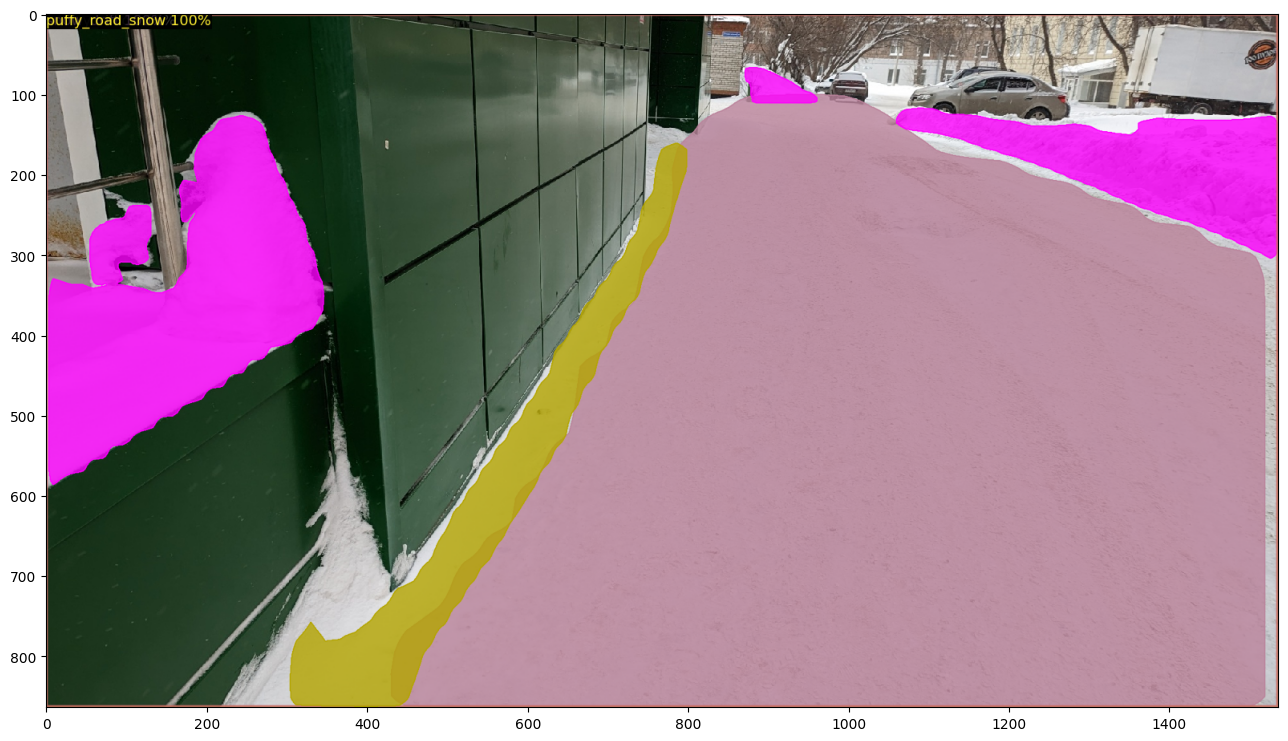

In [20]:
data_path = 'DATA/test/58.jpg'
img = cv2.imread(data_path)
old_outputs = predictor(img)
old_outputs = instance2semantic(old_outputs)
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
v = v.draw_instance_predictions(old_outputs.to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

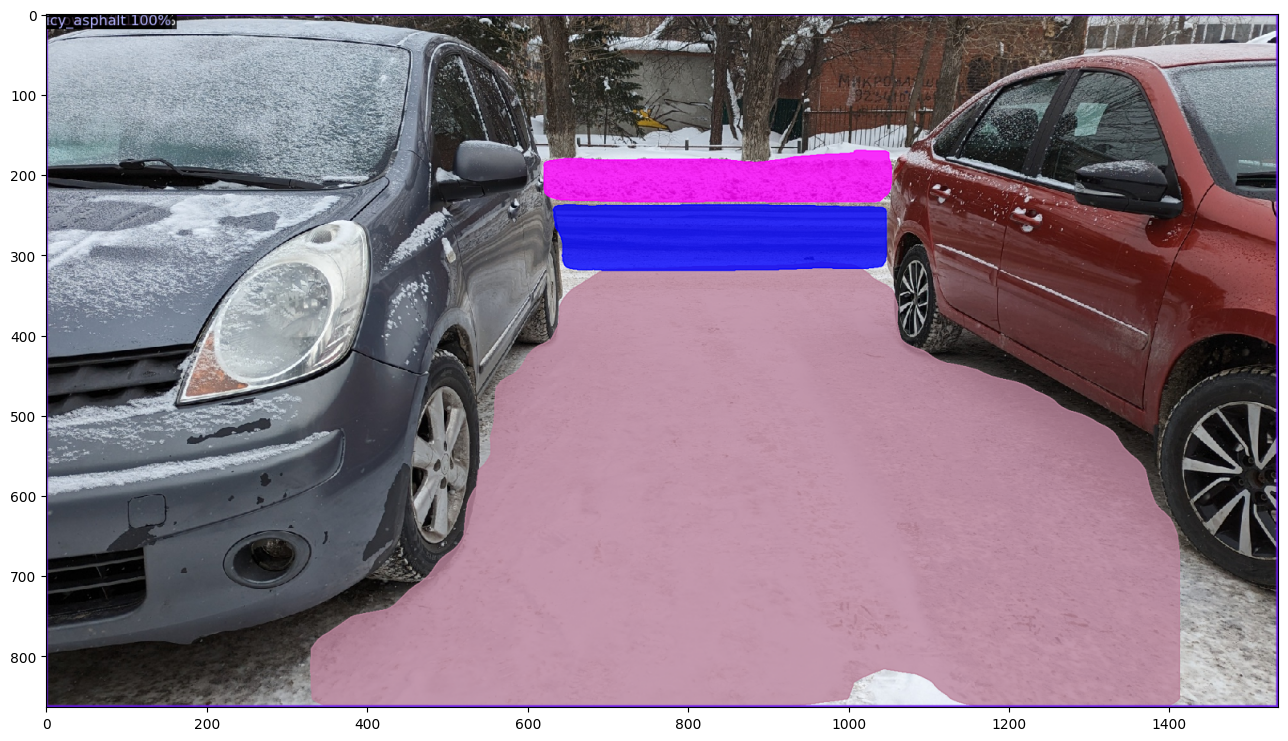

In [21]:
data_path = 'DATA/test/61.jpg'
img = cv2.imread(data_path)
new_outputs = predictor(img)
new_outputs = instance2semantic(new_outputs)
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
v = v.draw_instance_predictions(new_outputs.to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
new_outputs.pred_classes

tensor([5, 3, 1], device='cuda:0')

In [32]:
old_outputs.pred_classes.to("cpu").numpy().astype('int')

5

In [37]:
merged_classes = []
merged_masks = []

In [33]:
len(old_outputs.pred_classes.to("cpu").numpy().astype('int'))

3

In [38]:
merged_classes = torch.cat((old_outputs.pred_classes, new_outputs.pred_classes))
merged_masks = torch.cat((old_outputs.pred_masks, new_outputs.pred_masks))

In [36]:
merged_classes

tensor([5, 3, 4, 5, 3, 1], device='cuda:0')

In [39]:
merged_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [59]:
classes_merged = []
masks_merged = []
scores_merged = []
#flag = True
for i in range(len(merged_classes)):
    for j in range(i, len(merged_classes)):
        if merged_classes[i] == merged_classes[j]:
            if (int(merged_classes[i].cpu()) not in classes_merged):
                classes_merged.append(int(merged_classes[i].cpu()))

for cls in classes_merged:
    last_mask = None
    print(cls)
    for i in range(len(merged_classes)):
        if cls == int(merged_classes[i].cpu()):
            if last_mask == None:
                last_mask = merged_masks[i]
            last_mask = torch.logical_or(merged_masks[i], last_mask)
    masks_merged.append(last_mask.to('cpu').numpy().astype('bool'))
                
             
for i in range(len(classes_merged)):
    scores_merged.append(1)
num_inst = len(classes_merged)

5
3
4
1


In [48]:
classes_merged

[5, 3, 4, 1]

In [60]:
masks_merged

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [50]:
scores_merged

[1, 1, 1, 1]

In [51]:
box = [0, 0, 1920, 1080]

In [63]:
boxes_merged = []
for i in range(len(classes_merged)):
    boxes_merged.append(box)
boxes_merged = torch.tensor(boxes_merged)
boxes_merged = detectron2.structures.boxes.Boxes(boxes_merged)
    
classes_merged = torch.tensor(classes_merged)
masks_merged = torch.tensor(masks_merged)
scores_merged = torch.tensor(scores_merged)
    
merged_ouputs = detectron2.structures.instances.Instances(image_size = (1080, 1920))
merged_ouputs.set('pred_boxes', boxes_merged)
merged_ouputs.set('scores', scores_merged)
merged_ouputs.set('pred_classes', classes_merged)
merged_ouputs.set('pred_masks', masks_merged)


D:\Ott_diploma_proj_prog_files\conda\envs\ott_diploma\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
D:\Ott_diploma_proj_prog_files\conda\envs\ott_diploma\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Ott_diploma_proj_prog_files\conda\envs\ott_diploma\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == "__main__":


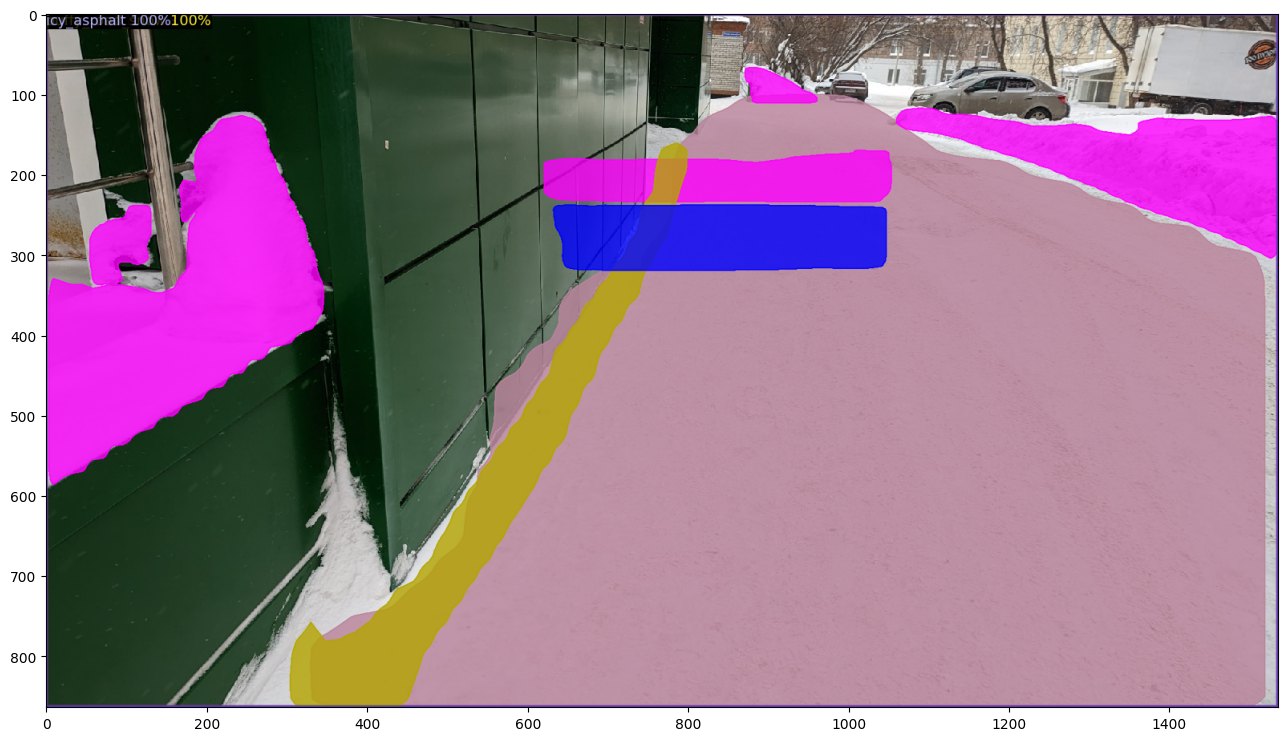

In [65]:
data_path = 'DATA/test/58.jpg'
img = cv2.imread(data_path)

v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
v = v.draw_instance_predictions(merged_ouputs.to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

delete in the end

In [9]:
cap = cv2.VideoCapture("DATA/video/1.mp4")
old_output = None
flag1 = False
flag2 = False
i = 1
while(cap.isOpened()):
    i+=1
    print(i)
    success, img = cap.read()
    if success == True:
        img = cv2.resize(img, (1920, 1080), interpolation = cv2.INTER_AREA)
        outputs = predictor(img)
        
        if (flag1 == False) or (flag2 == False):
            new_outputs = instance2semantic(outputs)
        if flag == True:
            new_outputs = statistic_optimisation(outputs['instances'], old_outputs)
            
        v = MyVisualizer(img[:, :, ::-1],
                        metadata=microcontroller_metadata, 
                        scale=0.8, 
                        instance_mode=ColorMode.SEGMENTATION, # removes the colors of unsegmented pixels
        )
        v = v.draw_instance_predictions(new_outputs.to("cpu"))
        cv2.imshow("Image!", v.get_image()[:, :, ::-1])
        if (flag1 == True) and (flag2 == False):
            flag2 = True
        if flag1 == False:
            flag1 = True
        old_outputs = outputs['instances']
        
        #print(v.get_image()[:, :, ::-1].shape)
        
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
print("Done, Don!")

2


D:\Ott_diploma_proj_prog_files\conda\envs\ott_diploma\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:204.)


NameError: name 'flag' is not defined

In [8]:
def statistic_optimisation(new_outputs, old_outputs, old_old_outputs):
    merged_classes = torch.cat((old_old_outputs.pred_classes, old_outputs.pred_classes, new_outputs.pred_classes))
    merged_masks = torch.cat((old_old_outputs.pred_masks, old_outputs.pred_masks, new_outputs.pred_masks))
    
    classes_merged = []
    masks_merged = []
    scores_merged = []
    #flag = True
    for i in range(len(merged_classes)):
        for j in range(i, len(merged_classes)):
            if merged_classes[i] == merged_classes[j]:
                if (int(merged_classes[i].cpu()) not in classes_merged):
                    classes_merged.append(int(merged_classes[i].cpu()))

    for cls in classes_merged:
        last_mask = None
        #print(cls)
        for i in range(len(merged_classes)):
            if cls == int(merged_classes[i].cpu()):
                if last_mask == None:
                    last_mask = merged_masks[i]
                last_mask = torch.logical_or(merged_masks[i], last_mask)
        masks_merged.append(last_mask.to('cpu').numpy().astype('bool'))


    for i in range(len(classes_merged)):
        scores_merged.append(1)
    num_inst = len(classes_merged)
    
    box = [0, 0, 1920, 1080]
    
    boxes_merged = []
    for i in range(len(classes_merged)):
        boxes_merged.append(box)
    boxes_merged = torch.tensor(boxes_merged)
    boxes_merged = detectron2.structures.boxes.Boxes(boxes_merged)

    classes_merged = torch.tensor(classes_merged)
    masks_merged = torch.tensor(masks_merged)
    scores_merged = torch.tensor(scores_merged)

    merged_ouputs = detectron2.structures.instances.Instances(image_size = (1080, 1920))
    #merged_ouputs.set('pred_boxes', boxes_merged)
    #merged_ouputs.set('scores', scores_merged)
    merged_ouputs.set('pred_classes', classes_merged)
    merged_ouputs.set('pred_masks', masks_merged)
    
    return merged_ouputs

In [61]:
def colission_solver(outputs):
    classes = outputs.pred_classes.to('cpu').numpy().astype(int)
    masks = outputs.pred_masks
    for i in range(6):
        if i in classes:
            if i == 3:
                print(list(classes).index(i))
                if 5 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask )
            if i == 0:
                if 5 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 3 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if i == 1:
                if 5 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 3 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
                if 0 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(0)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
            if i == 2:
                if 5 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 3 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
                if 0 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(0)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 1 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(1)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if i ==4:
                if 5 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 3 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
                if 0 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(0)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 1 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(1)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
                if 2 in classes:
                    tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(2)])
                    masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
    outputs.pred_masks = masks
    return outputs

In [62]:
flag1 = False
flag2 = False
old_old_outputs = None
old_outputs = None
cap = cv2.VideoCapture("DATA/video/1.mp4")
while(cap.isOpened()):
    success, img = cap.read()
    if success == True:
        img = cv2.resize(img, (1920, 1080), interpolation = cv2.INTER_AREA)
        outputs = predictor(img)
        if (flag1==True) and (flag2==True):
            new_outputs = statistic_optimisation(outputs['instances'], old_outputs, old_old_outputs)
            new_outputs = colission_solver(new_outputs)
            old_old_outputs = old_outputs
            old_outputs = outputs["instances"]
        else:
            new_outputs = instance2semantic(outputs)
            new_outputs = colission_solver(new_outputs)
        
        v = MyVisualizer(img[:, :, ::-1],
                        metadata=microcontroller_metadata, 
                        scale=0.8, 
                        instance_mode=ColorMode.SEGMENTATION, # removes the colors of unsegmented pixels
        )
        v = v.draw_instance_predictions(new_outputs.to("cpu"))
        cv2.imshow("Image!", v.get_image()[:, :, ::-1])
        if (flag1 == True) and (flag2 == False):
            flag2 = True
            old_outputs = outputs["instances"]
        if flag1 == False:
            flag1 = True
            old_old_outputs = outputs["instances"]
            
        
        #print(v.get_image()[:, :, ::-1].shape)
        
        if cv2.waitKey(1) & 0xFF==ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
print("Done, Don!")

1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
1
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Done, Don!


# Exp with no colission

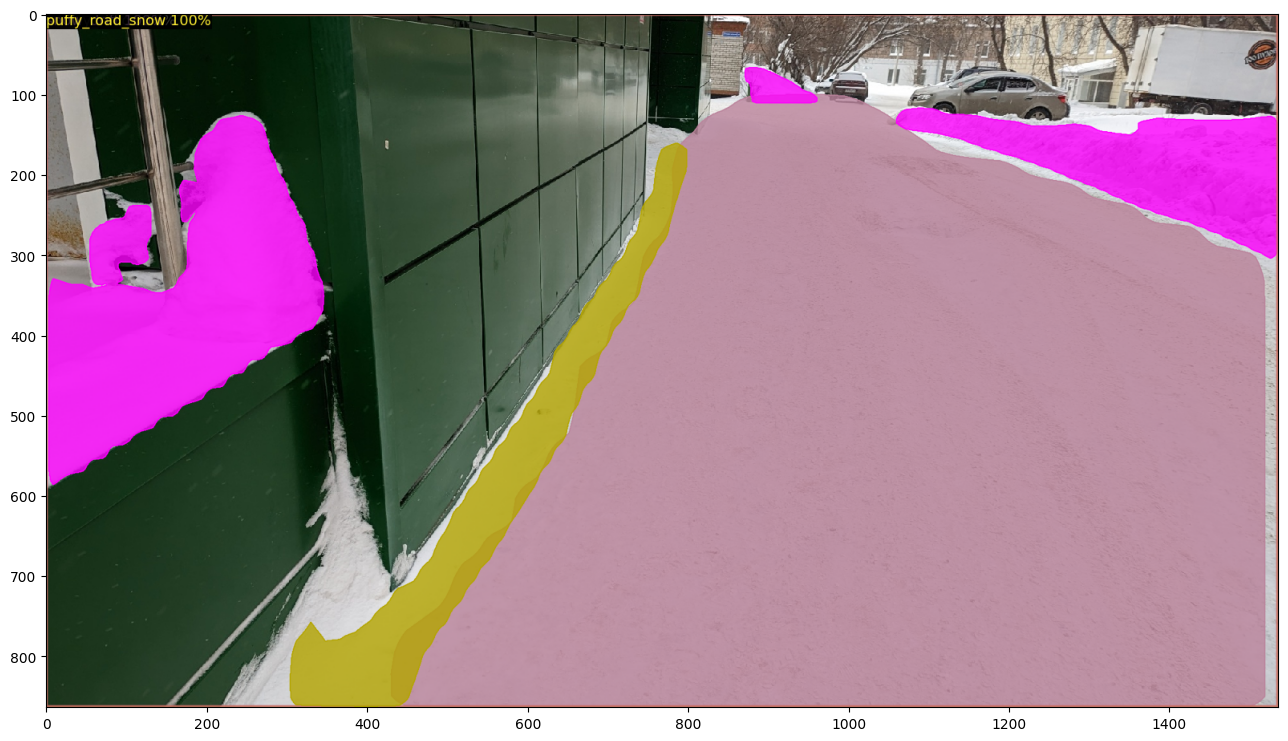

In [10]:
data_path = 'DATA/test/58.jpg'
img = cv2.imread(data_path)
old_outputs = predictor(img)
old_outputs = instance2semantic(old_outputs)
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
#draw_instance_predictions(new_outputs.to("cpu"))

v = v.draw_instance_predictions(old_outputs.to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
masks = np.asarray([])

In [31]:
masks

array([], dtype=float64)

In [ ]:
#perfect classes list(5, 3, 0, 1, 2, 4)

In [52]:
masks = old_outputs.pred_masks

In [53]:
masks[0]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [41]:
classes = old_outputs.pred_classes.to('cpu').numpy().astype(int)

In [45]:
classes

array([5, 3, 4])

In [57]:

for i in range(6):
    if i in classes:
        if i == 3:
            print(list(classes).index(i))
            if 5 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask )
        if i == 0:
            if 5 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 3 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
        if i == 1:
            if 5 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 3 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
            if 0 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(0)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
        if i == 2:
            if 5 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 3 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
            if 0 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(0)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 1 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(1)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
        if i ==4:
            if 5 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(5)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 3 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(3)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask) 
            if 0 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(0)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 1 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(1)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)
            if 2 in classes:
                tmp_mask = torch.logical_and(masks[list(classes).index(i)], masks[list(classes).index(2)])
                masks[list(classes).index(i)] = torch.logical_xor(masks[list(classes).index(i)], tmp_mask)


1


In [ ]:
old_outputs.pred_masks = masks

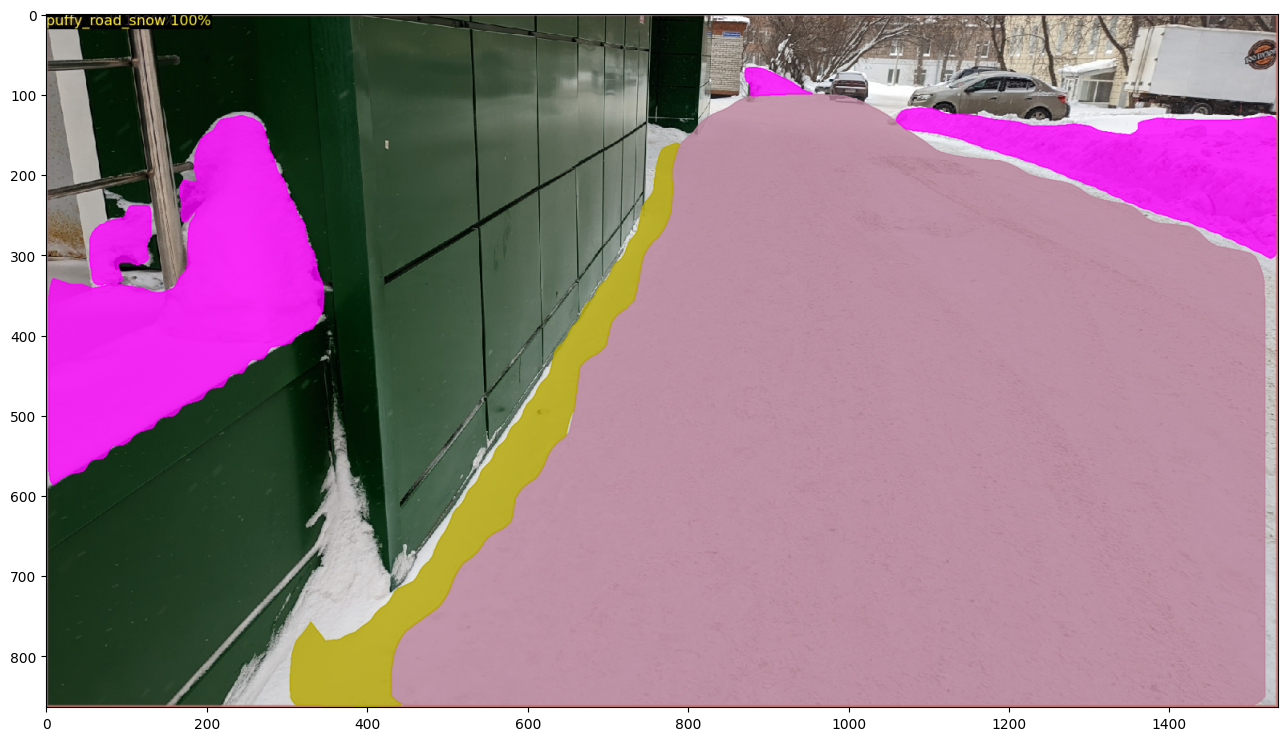

In [60]:
data_path = 'DATA/test/58.jpg'
img = cv2.imread(data_path)
old_outputs = predictor(img)
old_outputs = instance2semantic(old_outputs)
old_outputs.pred_masks = masks
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, 
)
#draw_instance_predictions(new_outputs.to("cpu"))

v = v.draw_instance_predictions(old_outputs.to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()